# Implementing PCA on MNIST data set for Digit Recognition:

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

loadedData = pd.read_csv('./train.csv')
print(loadedData.head())
print(loadedData.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [3]:
loadLabel = loadedData['label']
dropLabelData = loadedData.drop('label', axis=1)

print(loadLabel.shape)
print(dropLabelData.shape)

(42000,)
(42000, 784)


In [5]:
from sklearn.preprocessing import StandardScaler

standardizedData = StandardScaler().fit_transform(dropLabelData)
print(standardizedData.shape)

(42000, 784)


In [7]:
data = standardizedData

---

In [15]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 2
pcaData = pca.fit_transform(data)

print(pcaData.shape)

(42000, 2)


In [16]:
import seaborn as sn

pcaData = np.vstack((pcaData.T, loadLabel)).T
print(pcaData.shape)

(42000, 3)


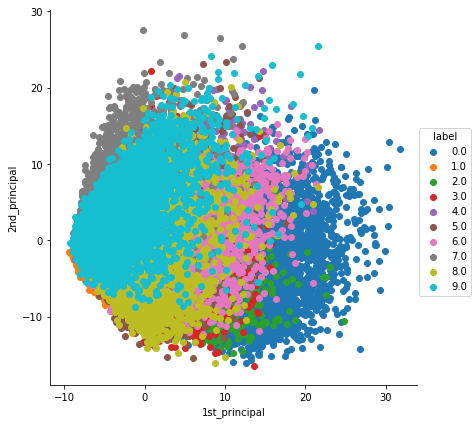

In [18]:
pcaDataframe = pd.DataFrame(data=pcaDataframe, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pcaDataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()